In [5]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [4]:
# Number of samples and features
n_samples = 41
n_features = 1000

# Generate a random matrix with values
data = np.random.rand(n_samples, n_features)

# Generate column names as strings (e.g., Feature1, Feature2, ..., Feature1000)
column_names = [f"Feature{i}" for i in range(1, n_features + 1)]

# Create a DataFrame with the generated data and column names
dataframe = pd.DataFrame(data, columns=column_names)

dataframe.head()  # Display the first few rows of the dataframe



,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000
0,0.876721,0.167459,0.316723,0.216957,0.235661,0.738067,0.232377,0.572378,0.835087,0.706126,...,0.313309,0.414203,0.360505,0.107038,0.717117,0.994807,0.926466,0.180633,0.974008,0.864464
1,0.376714,0.526469,0.902333,0.835375,0.510404,0.983277,0.914767,0.997026,0.938546,0.702922,...,0.168916,0.515614,0.833080,0.996603,0.286514,0.026701,0.210773,0.544422,0.293588,0.416509
2,0.357992,0.527882,0.170672,0.174193,0.491608,0.187396,0.496151,0.089818,0.761986,0.660044,...,0.040857,0.896664,0.905251,0.643421,0.595537,0.609698,0.667767,0.837711,0.506912,0.270160
3,0.410276,0.921843,0.500776,0.253949,0.726473,0.910359,0.973306,0.609240,0.120264,0.280078,...,0.640915,0.350126,0.736743,0.947688,0.780321,0.756362,0.253796,0.572819,0.964164,0.344297
4,0.583391,0.746066,0.989134,0.212589,0.779390,0.103169,0.537745,0.082967,0.592312,0.842234,...,0.307444,0.732416,0.706843,0.301886,0.502917,0.786522,0.272537,0.919234,0.529299,0.274309


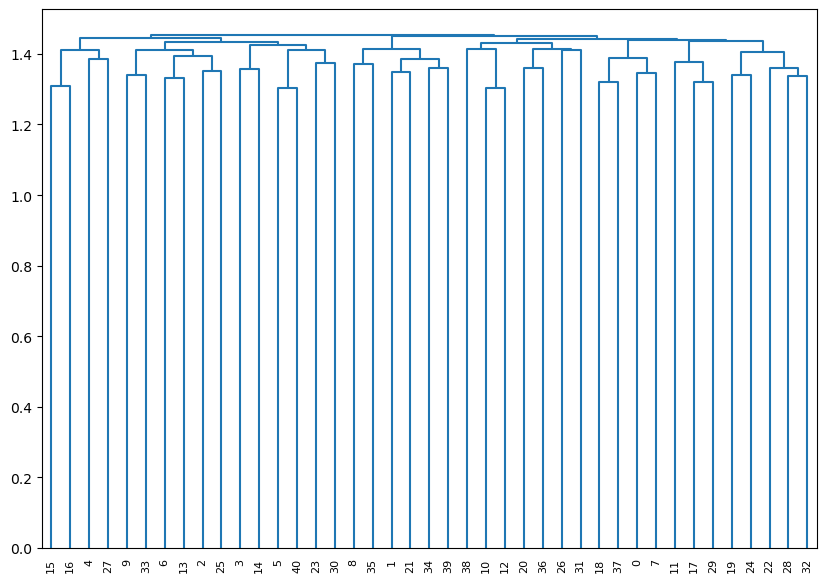

In [6]:
# Assuming `data` is your 41 x 22000 matrix
# data = ...

# Step 1: Compute the correlation matrix
corr_matrix = np.corrcoef(dataframe)

# Step 2: Perform hierarchical clustering
Z = linkage(corr_matrix, 'average')

# Optional: Plot the dendrogram for visual analysis
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


In [ ]:

# Step 3: Form clusters - choose the number of clusters based on dendrogram
n_clusters = 10  # Example value, adjust based on your analysis
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
cluster.fit_predict(corr_matrix)

# Step 4: Reduce features by selecting a representative for each cluster
feature_indices = range(data.shape[1])
clustered_features = pd.Series(feature_indices, index=cluster.labels_).groupby(level=0).apply(list)

# Select a representative (e.g., first feature in each cluster)
reduced_features_indices = [features[0] for features in clustered_features]

# Reduced dataset
reduced_data = data[:, reduced_features_indices]

print("Original number of features:", data.shape[1])
print("Reduced number of features:", reduced_data.shape[1])
